# Load Libraries and Load dataset

In [3]:
# Enable inline plotting in the notebook. Comes before importing matplotlib
%matplotlib inline
# import libraries
import matplotlib.pyplot as plt # for plotting
import pandas as pd # for working with dataframes
import numpy as np # for arrays. mathematical operations
import pylab # matplotlib module used for Q-Q plot
import plotnine as p9 # python ggplot. Create plotting graphics declaratively. Density plots
import statsmodels.api as sm  # For multiple linear regression
import statsmodels.stats.outliers_influence as inf  # For checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy import stats  # For statistical functions; qq plots of residuals
import seaborn as sns  # For correlation plots advanced visualization options; requires pandas and matplotlib
import sklearn  # For machine learning algorithms and tools
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination (RFE)
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as sk  # For ensemble methods like RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # For logistic regression (used as RFE estimator)
from sklearn.pipeline import Pipeline  # For creating a pipeline of data transformations
from sklearn.preprocessing import StandardScaler # for standardizing
from sklearn.model_selection import (
    train_test_split,  # For splitting data into training and testing sets
    cross_val_score,  # For cross-validation
    RepeatedKFold)  # For repeated k-fold cross-validation
# from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.metrics import (
    accuracy_score,  # For accuracy metric in classification tasks
    mean_absolute_error)  # For mean absolute error metric in regression tasks

In [4]:
# Import Data
df = pd.read_csv('c:/LabFiles/d208/medical/medical_clean.csv', index_col=0) # path to csv; change for your environment
df.index.names = ['index'] # we are using CaseNumber as the index. relabeling it as 'index' to be clear how it is being used.
pd.set_option("display.max_columns", None) # to display all columns
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# C1 - Data Cleaning
## Check for Duplicates and Nulls

In [2]:
# Check for Nulls and duplicates
## Duplicates whole dataframe
print(f"Are there duplicates in the 10,000 rows?\n{df.duplicated().value_counts()}")
## Check for Nulls with `isnull().sum()`
null_counts = df.isnull().sum()
null_variables = null_counts[null_counts > 0]
print(f"\nColumns with NULL values would appear here==> {null_variables}\n")
# Visual check
print('Visual spot check. Is everything as expected?')
print(f"\n{df.info()}")

Are there duplicates in the 10,000 rows?
False    10000
Name: count, dtype: int64

Columns with NULL values would appear here==> Series([], dtype: int64)

Visual spot check. Is everything as expected?
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job 

## Check for Outliers

Checking with Boxplots
Outliers for Age: 0
Outliers for Income: 326
Outliers for VitD_levels: 60
Outliers for Initial_days: 0
Outliers for TotalCharge: 0
Outliers for Additional_charges: 424


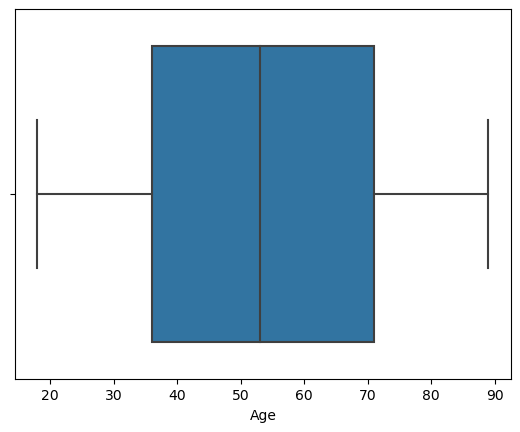

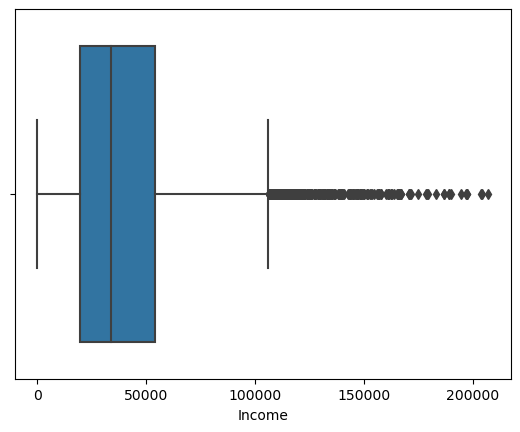

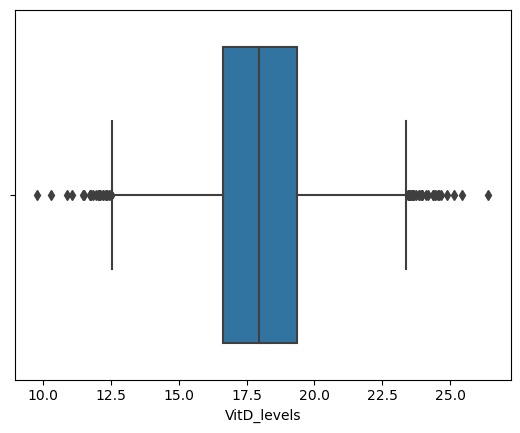

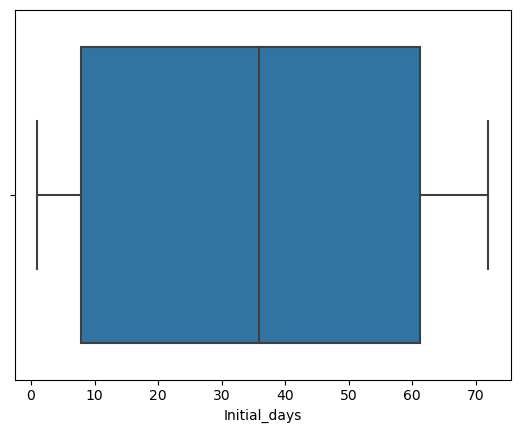

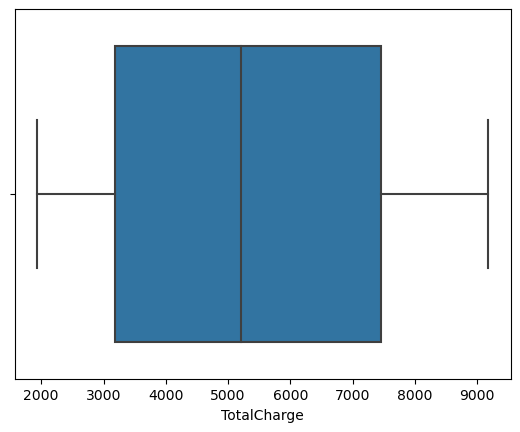

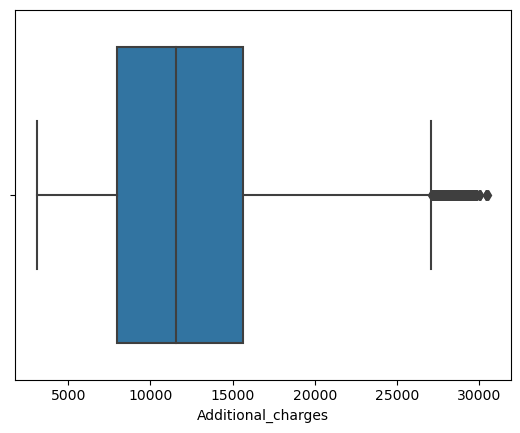

In [3]:
# Check with boxplots
# Boxplots
print('Checking with Boxplots')
# filter on only int64 and float64 datatype
int_float_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

# create check_outliers. Drop the columns we don't want 'CaseOrder', 'Lat', 'Lng', Unnamed: 0, 'Zip'. 'Overweight' and 'Anxiety' are qualitative values that are expressed numerically, and will be omitted
check_outliers = [col for col in int_float_cols if col in ('Initial_days', 'TotalCharge', 'Additional_charges', 'VitD_levels', 'Income', 'Age')] # and not col.startswith('Item')] # list columns we DON'T want

# # Create a figure for each column
for col in check_outliers:
    plt.figure()
    sns.boxplot(x=df[col], data=df)
    
    # Get the lower and upper whiskers for the column
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # Get the outliers for the column
    outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)][col]
    
    # Print the outliers for the column
    print(f"Outliers for {col}: {outliers.count()}")

# C2 - Summary Statistics
## Cleaned Data

In [78]:
initial_variables = df[['Initial_days', 'Anxiety', 'Diabetes', 'Soft_drink', 'TotalCharge', 'Additional_charges', 'VitD_levels', 'Income', 'Age', 'ReAdmis', 'HighBlood', 'Overweight', 'Hyperlipidemia', 'Complication_risk']]
initial_variables.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.161020,71.981490
TotalCharge,10000.0,5312.172769,2180.393838,1938.312067,3179.374015,5213.952000,7459.699750,9180.728000
Additional_charges,10000.0,12934.528587,6542.601544,3125.703000,7986.487755,11573.977735,15626.490000,30566.070000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Income,10000.0,40490.495160,28521.153293,154.080000,19598.775000,33768.420000,54296.402500,207249.100000
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000


In [15]:
initial_variables.describe(include = 'O').transpose()

,count,unique,top,freq
Anxiety,10000,2,No,6785
Diabetes,10000,2,No,7262
Soft_drink,10000,2,No,7425
ReAdmis,10000,2,No,6331
HighBlood,10000,2,No,5910
Overweight,10000,2,Yes,7094
Hyperlipidemia,10000,2,No,6628
Complication_risk,10000,3,Medium,4517


# C3 - Univariate and Bivariate Visualizations
## Histograms of Quantitative Values

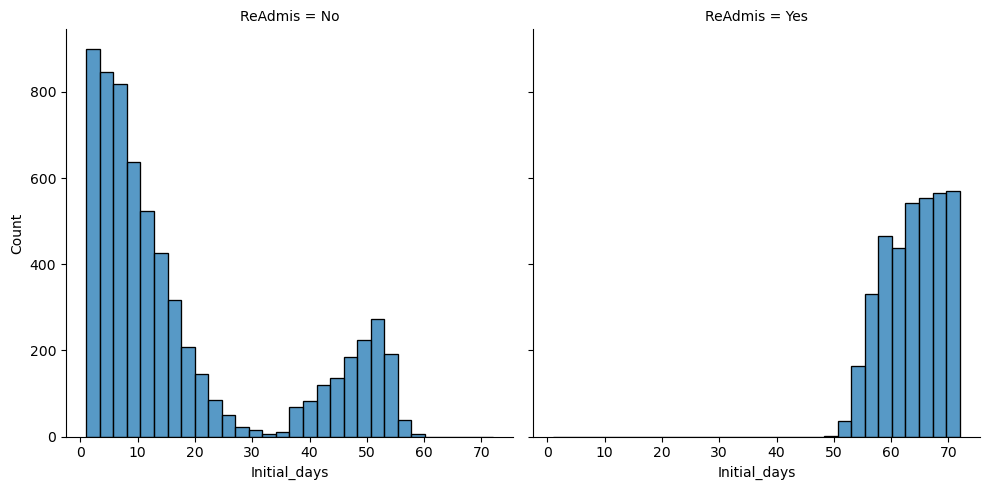

In [16]:
# seaborn histograms, break up by categorical
sns.displot(data=df,
            x="Initial_days",
            col="ReAdmis",
            col_wrap=2,
            bins=30)
plt.show() 

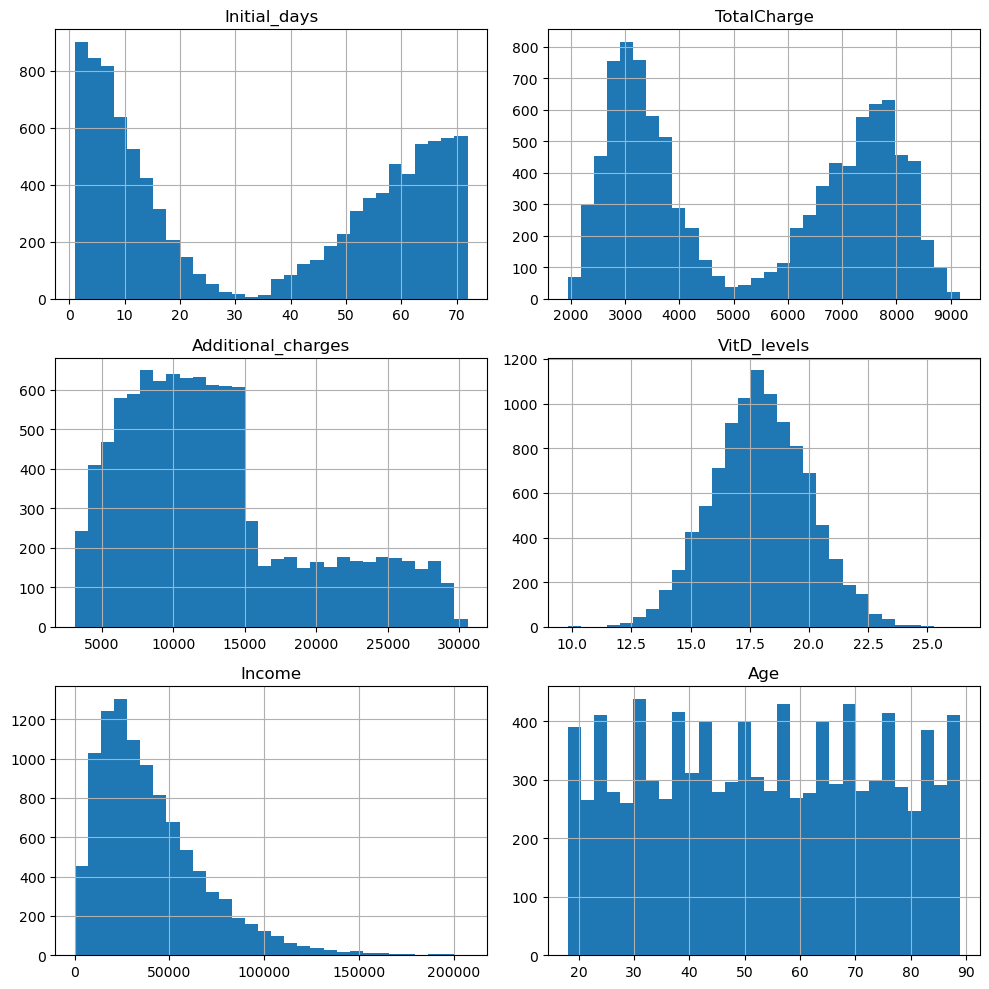

In [79]:
# Histograms
# oner, histograms for numeric variables in the dataframe
initial_variables.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()

## scatterplots with regression lines

In [9]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is

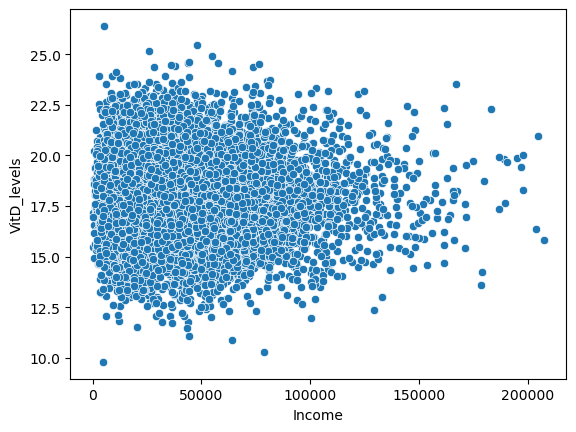

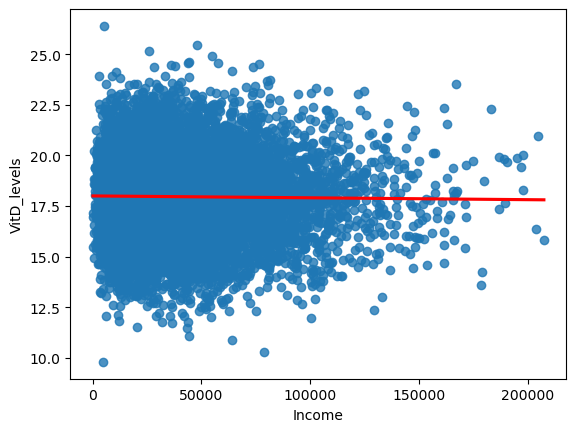

In [10]:
# with seaborn
sns.scatterplot(x="Income",
                y="VitD_levels",
                data=df)
plt.show()
# with regression line, different method is used
sns.regplot(x="Income",
            y="VitD_levels",
            data=df,
            ci=None,
            line_kws={"color": "red"})
plt.show()


## Univariate Statistics for Qualitative Variables


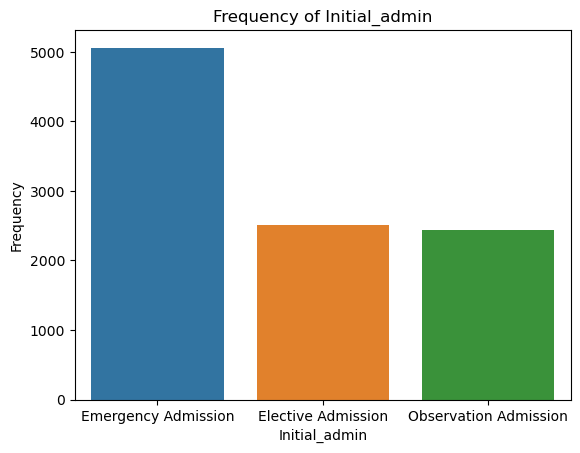

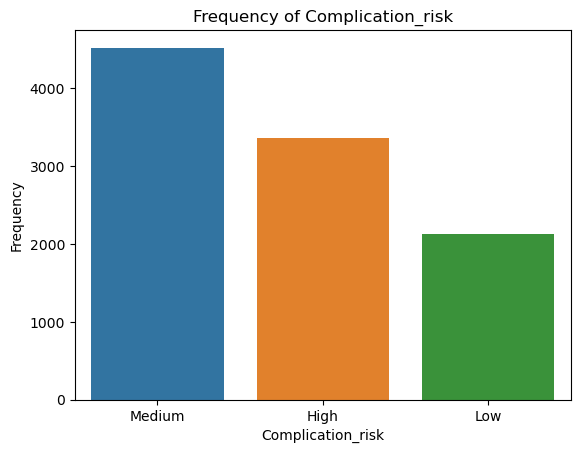

In [7]:
# Bar Charts for Categorical data: Initial_admin; Complication_risk
# Initial_admin
sns.countplot(x='Initial_admin', data=df)
plt.xlabel('Initial_admin')
plt.ylabel('Frequency')
plt.title('Frequency of Initial_admin')
plt.show()
# Complication_risk
sns.countplot(x='Complication_risk', data=df)
plt.xlabel('Complication_risk')
plt.ylabel('Frequency')
plt.title('Frequency of Complication_risk')
plt.show()

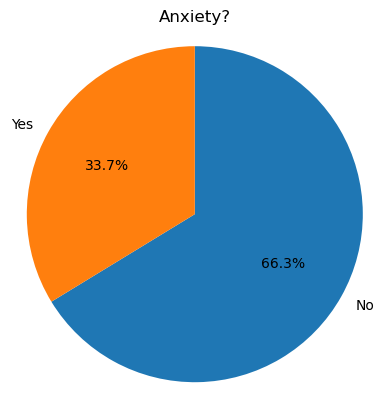

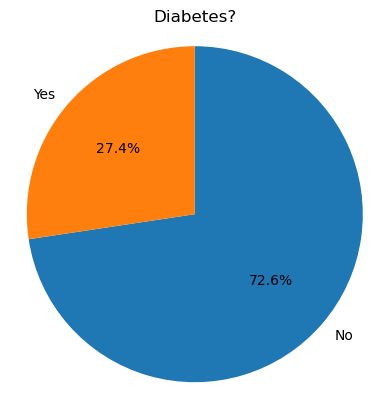

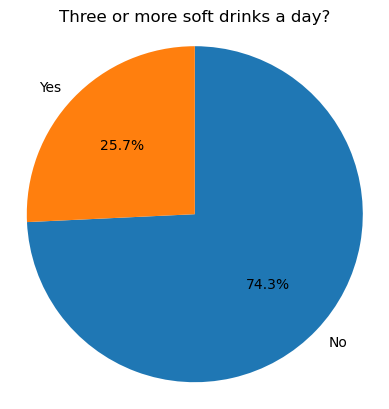

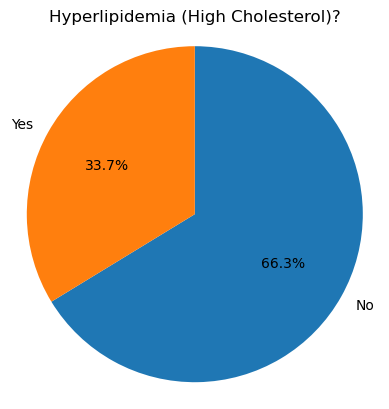

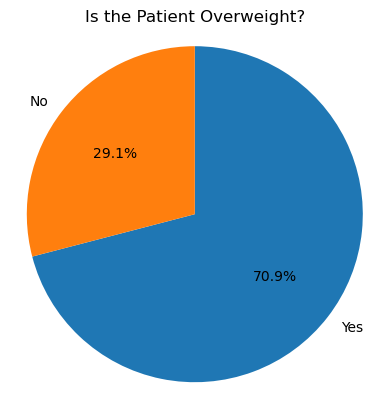

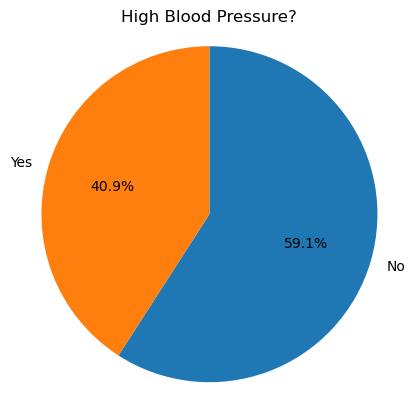

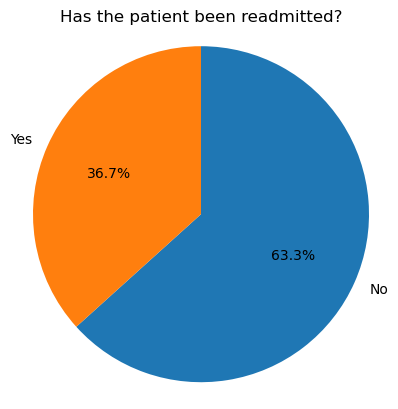

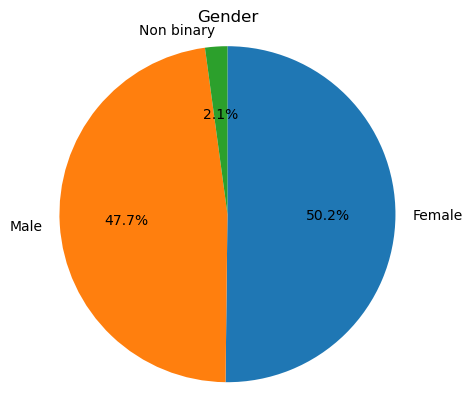

In [8]:
# Univariate Pie Charts for Yes/No categorical
# LEFT plot: Univariate exploration of diabetes
# Anxiety
plt.title('Anxiety?')
hl_counts = df.Hyperlipidemia.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Hyperlipidemia
# Hyperlipidemia
plt.title('Diabetes?')
hl_counts = df.Diabetes.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Hyperlipidemia
plt.title('Three or more soft drinks a day?')
hl_counts = df.Soft_drink.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
plt.title('Hyperlipidemia (High Cholesterol)?')
hl_counts = df.Hyperlipidemia.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Overweight
plt.title('Is the Patient Overweight?')
hl_counts = df.Overweight.value_counts()
hl_labels = ["Yes", "No"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# HighBlood
plt.title('High Blood Pressure?')
hl_counts = df.HighBlood.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# ReAdmis
plt.title('Has the patient been readmitted?')
hl_counts = df.ReAdmis.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Gender
plt.title('Gender')
hl_counts = df.Gender.value_counts()
hl_labels = ["Female", "Male", "Non binary"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();

# Bivariate Statistics
## Scatterplots

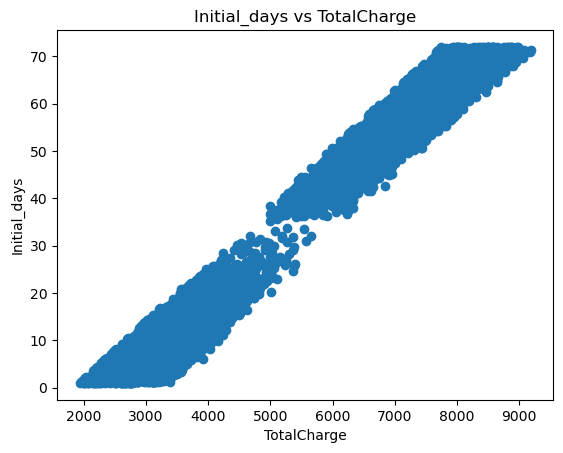

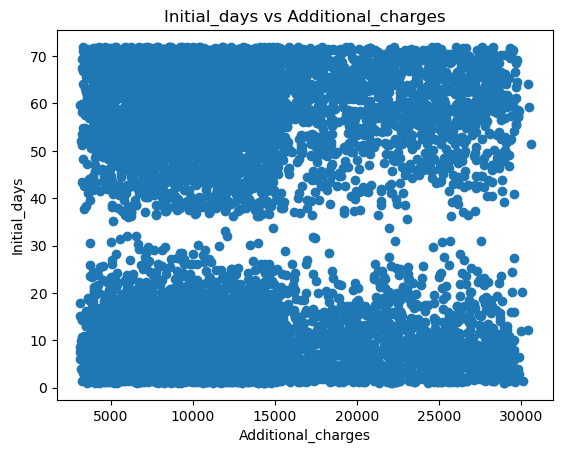

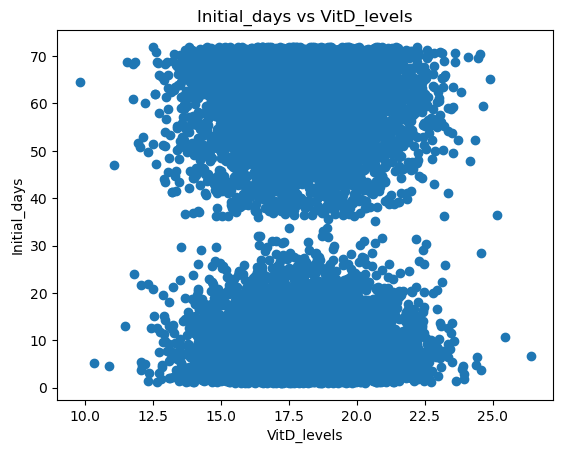

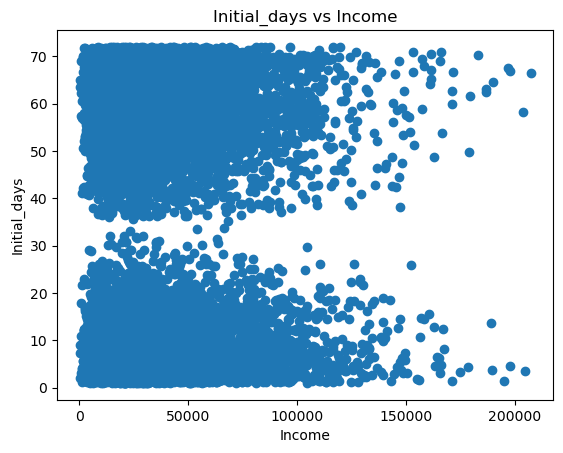

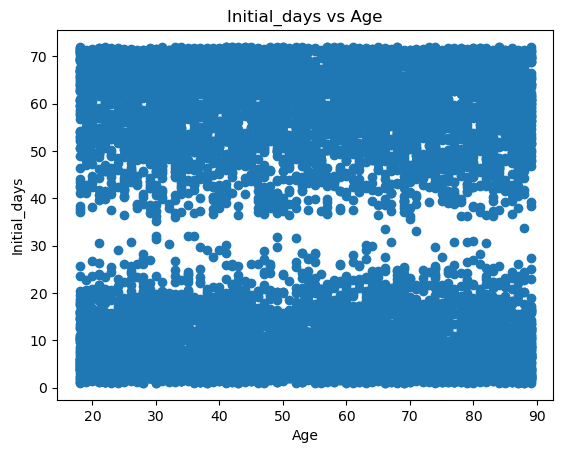

In [104]:
# Bivariate Scatterplots for numeric data
# scatterplot Initial_days vs TotalCharge
plt.scatter(x='TotalCharge', y='Initial_days', data=df)
plt.title('Initial_days vs TotalCharge')
plt.xlabel('TotalCharge')
plt.ylabel('Initial_days')
plt.show()
# scatterplot Initial_days vs Additional_charge
plt.scatter(x='Additional_charges', y='Initial_days', data=df)
plt.title('Initial_days vs Additional_charges')
plt.xlabel('Additional_charges')
plt.ylabel('Initial_days')
plt.show()
# scatterplot Initial_days vs VitD_levels
plt.scatter(x='VitD_levels', y='Initial_days', data=df)
plt.title('Initial_days vs VitD_levels')
plt.xlabel('VitD_levels')
plt.ylabel('Initial_days')
plt.show()
# scatterplot Initial_days vs Income
plt.scatter(x='Income', y='Initial_days', data=df)
plt.title('Initial_days vs Income')
plt.xlabel('Income')
plt.ylabel('Initial_days')
plt.show()
# scatterplot Initial_days vs Age
plt.scatter(x='Age', y='Initial_days', data=df)
plt.title('Initial_days vs Age')
plt.xlabel('Age')
plt.ylabel('Initial_days')
plt.show()

## Density Plots

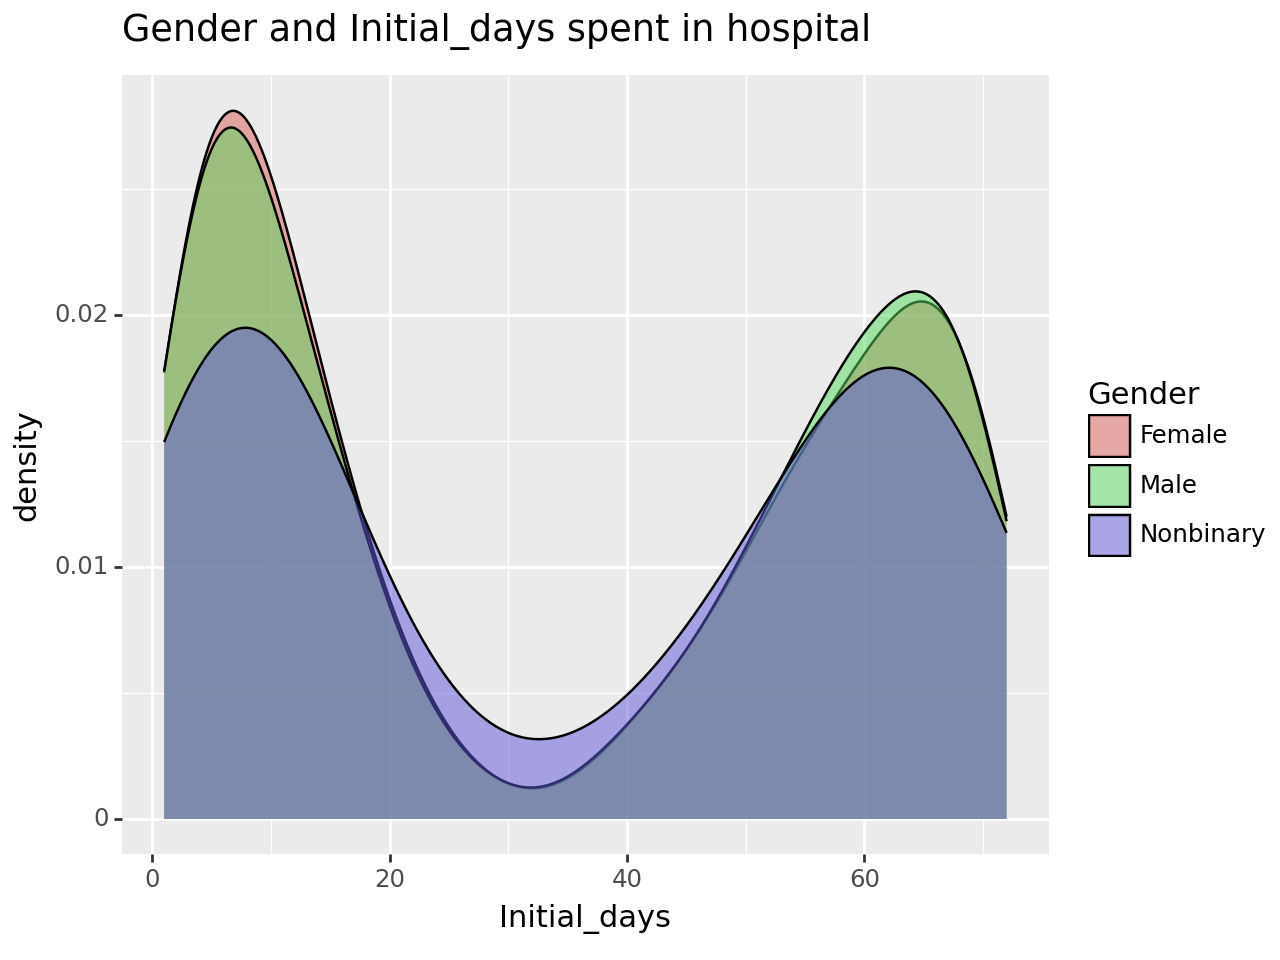

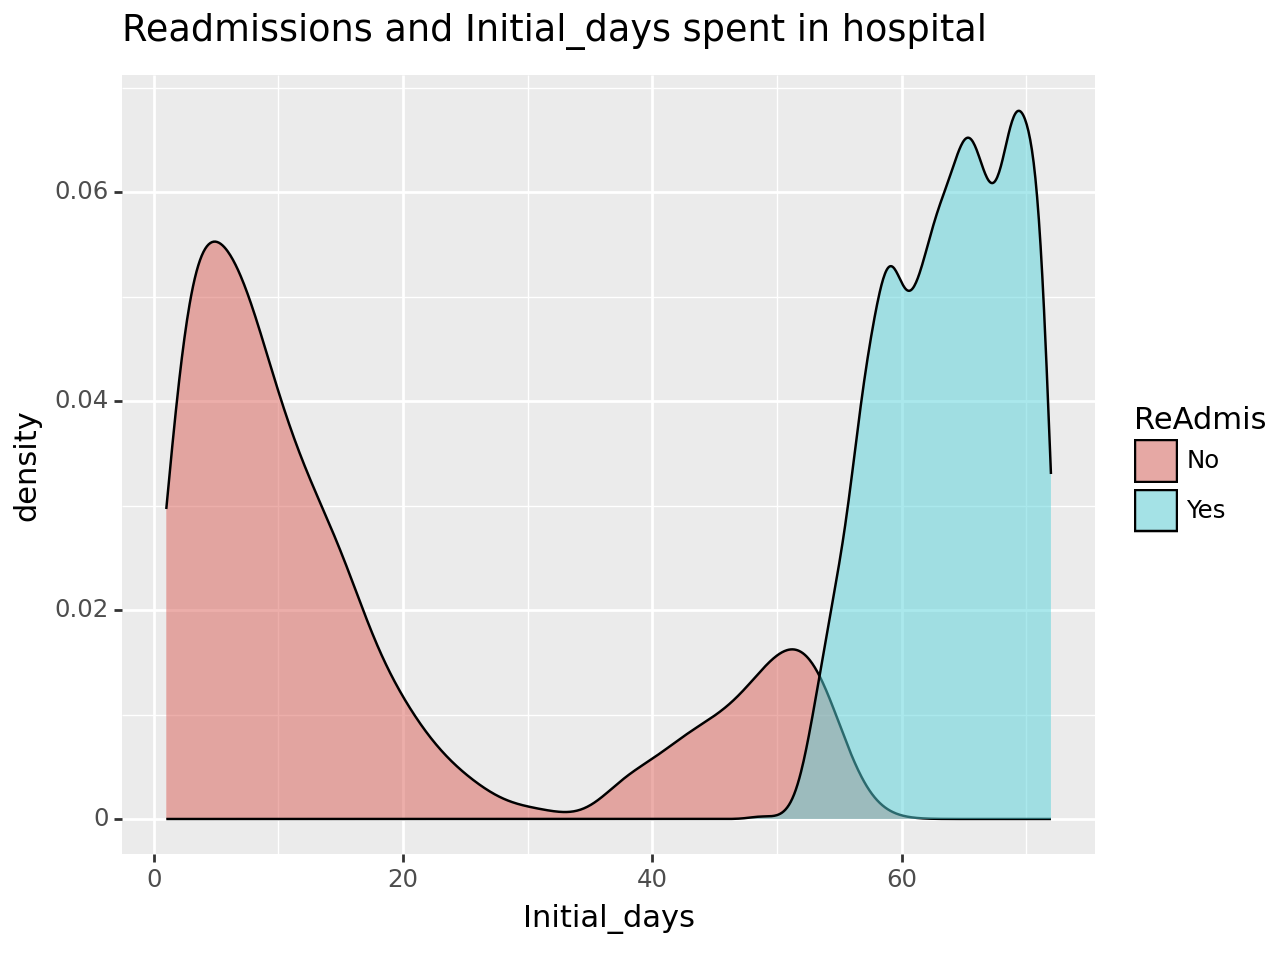

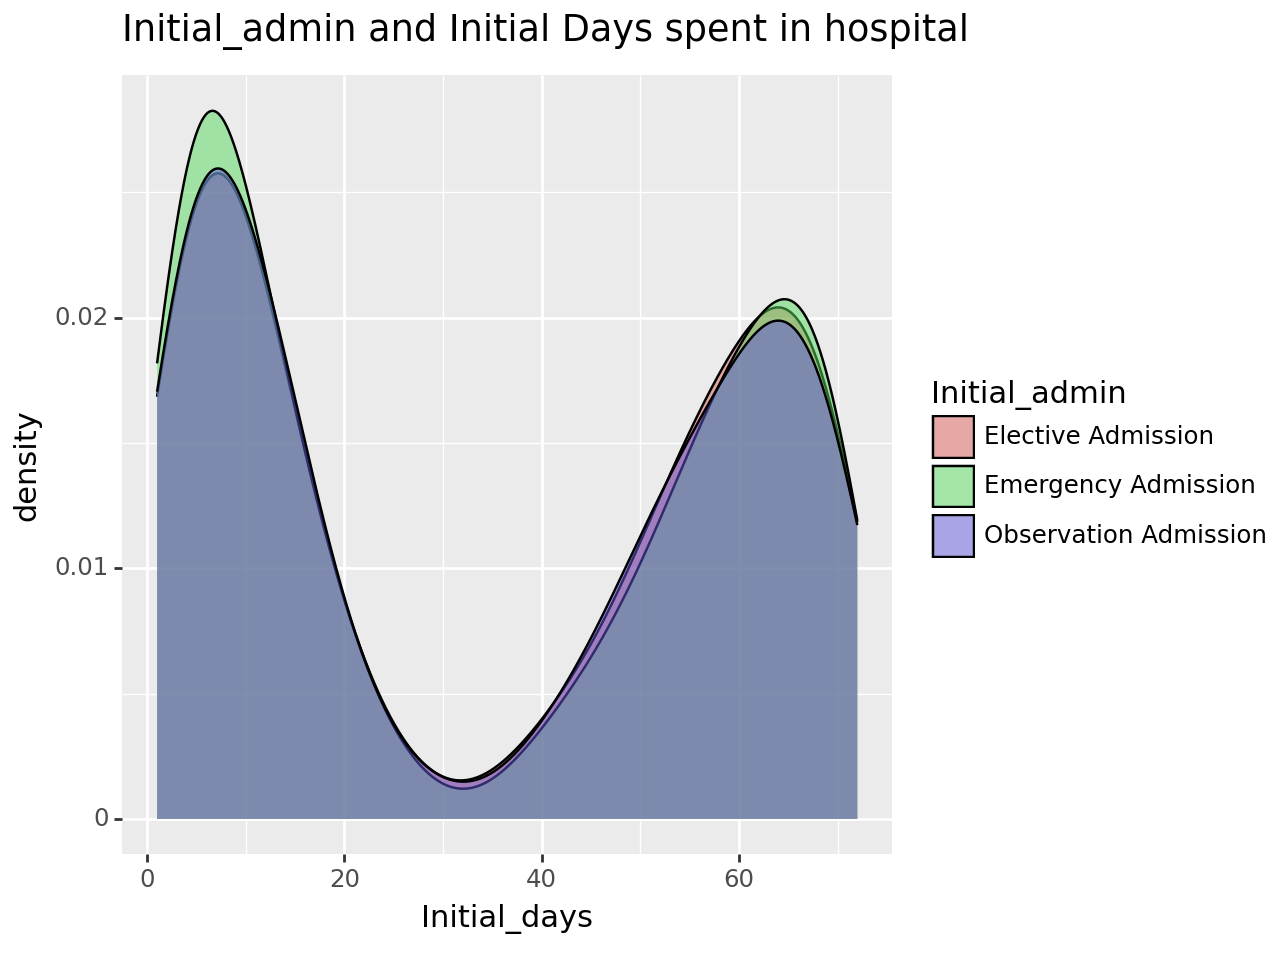

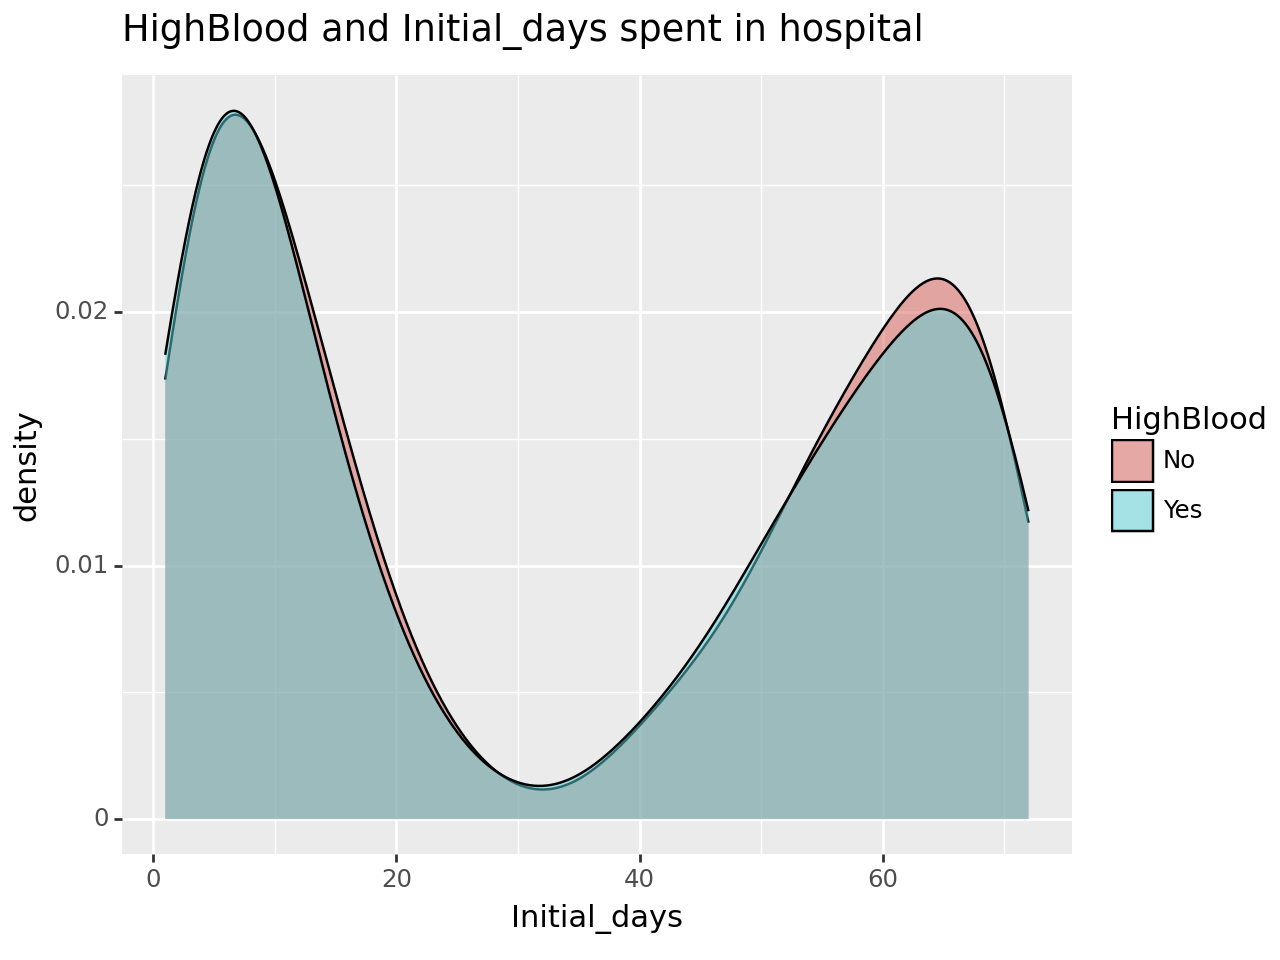

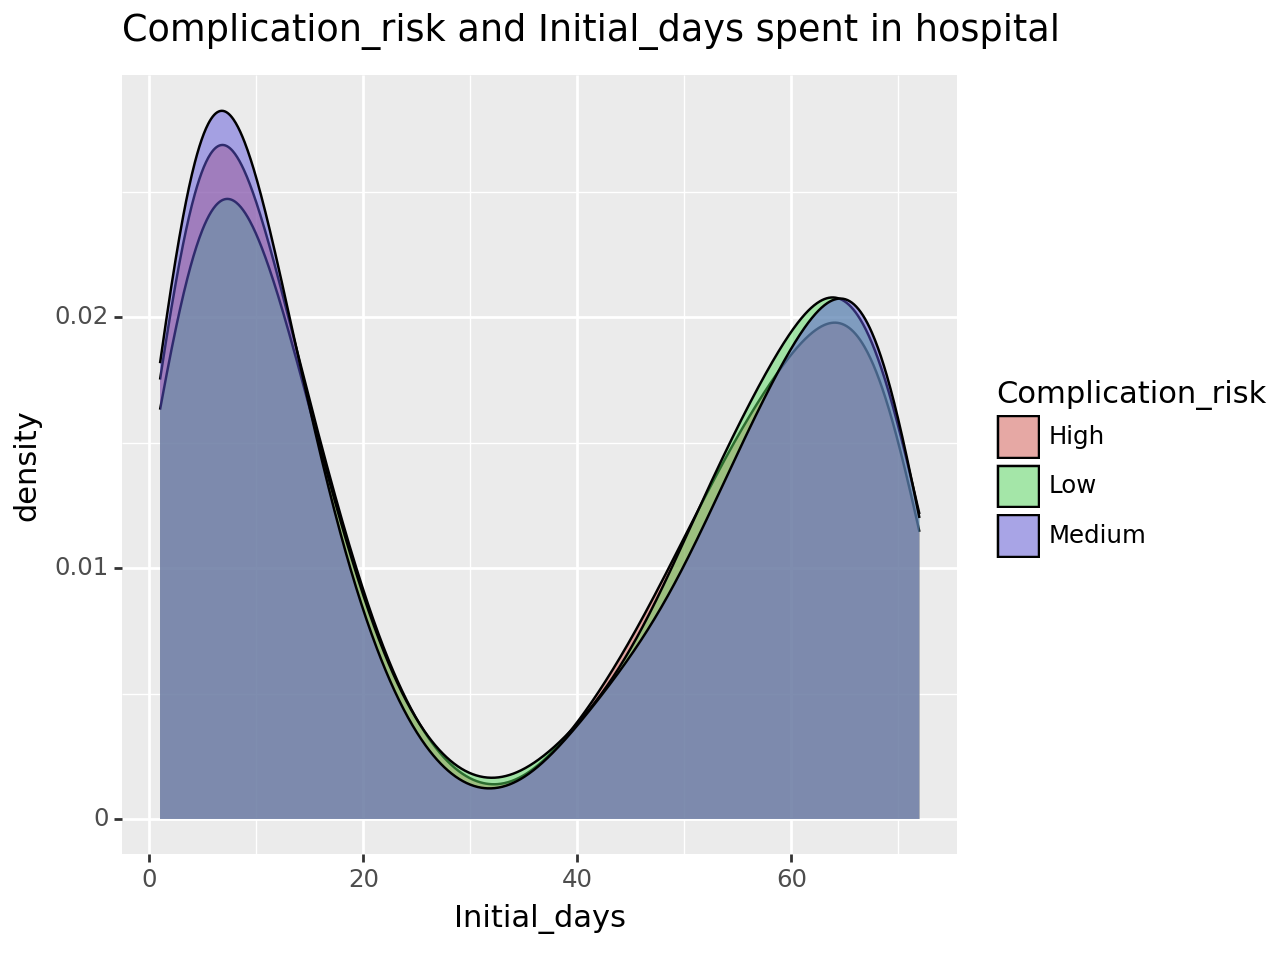

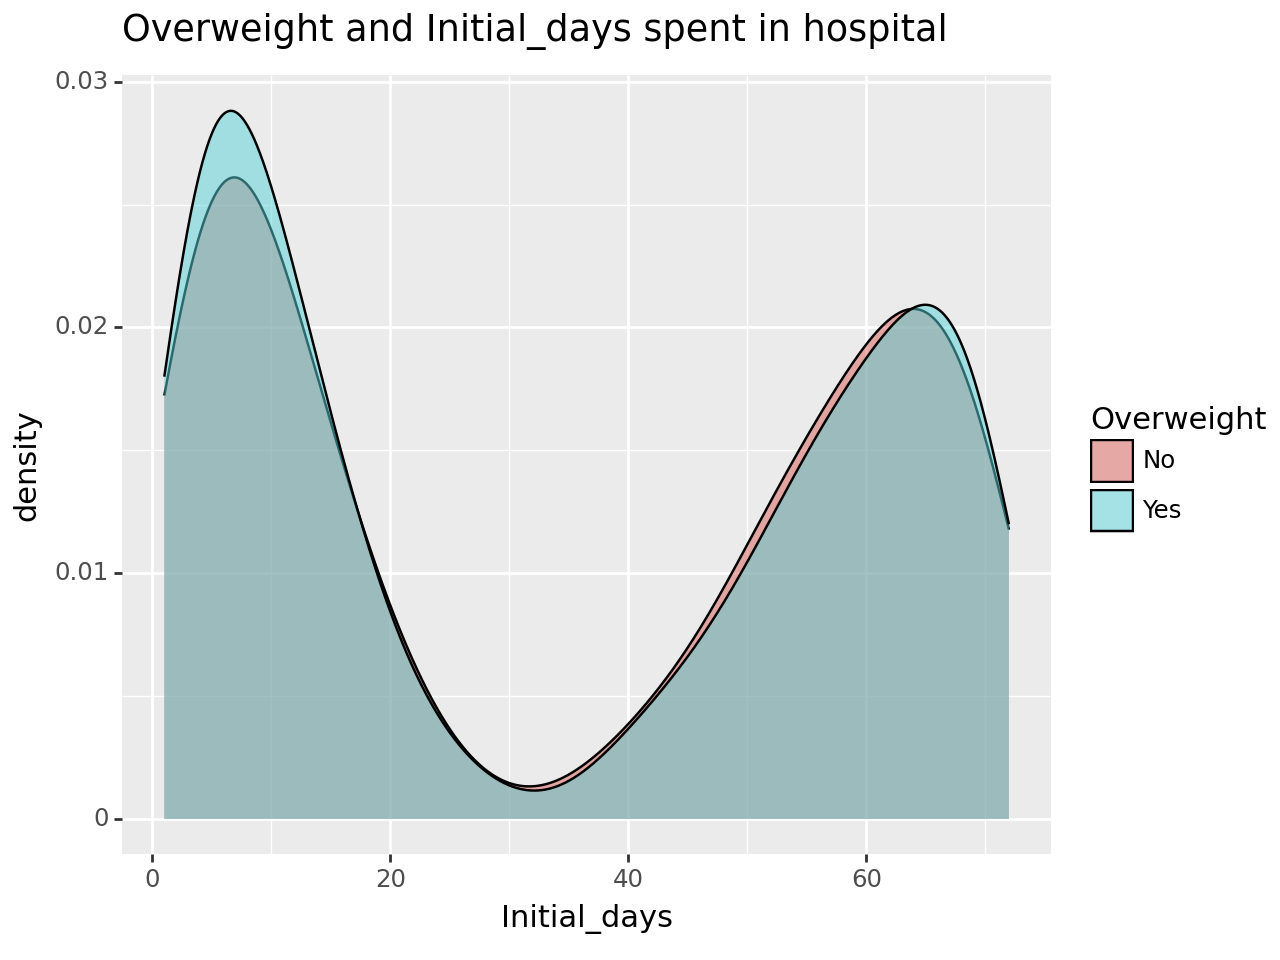

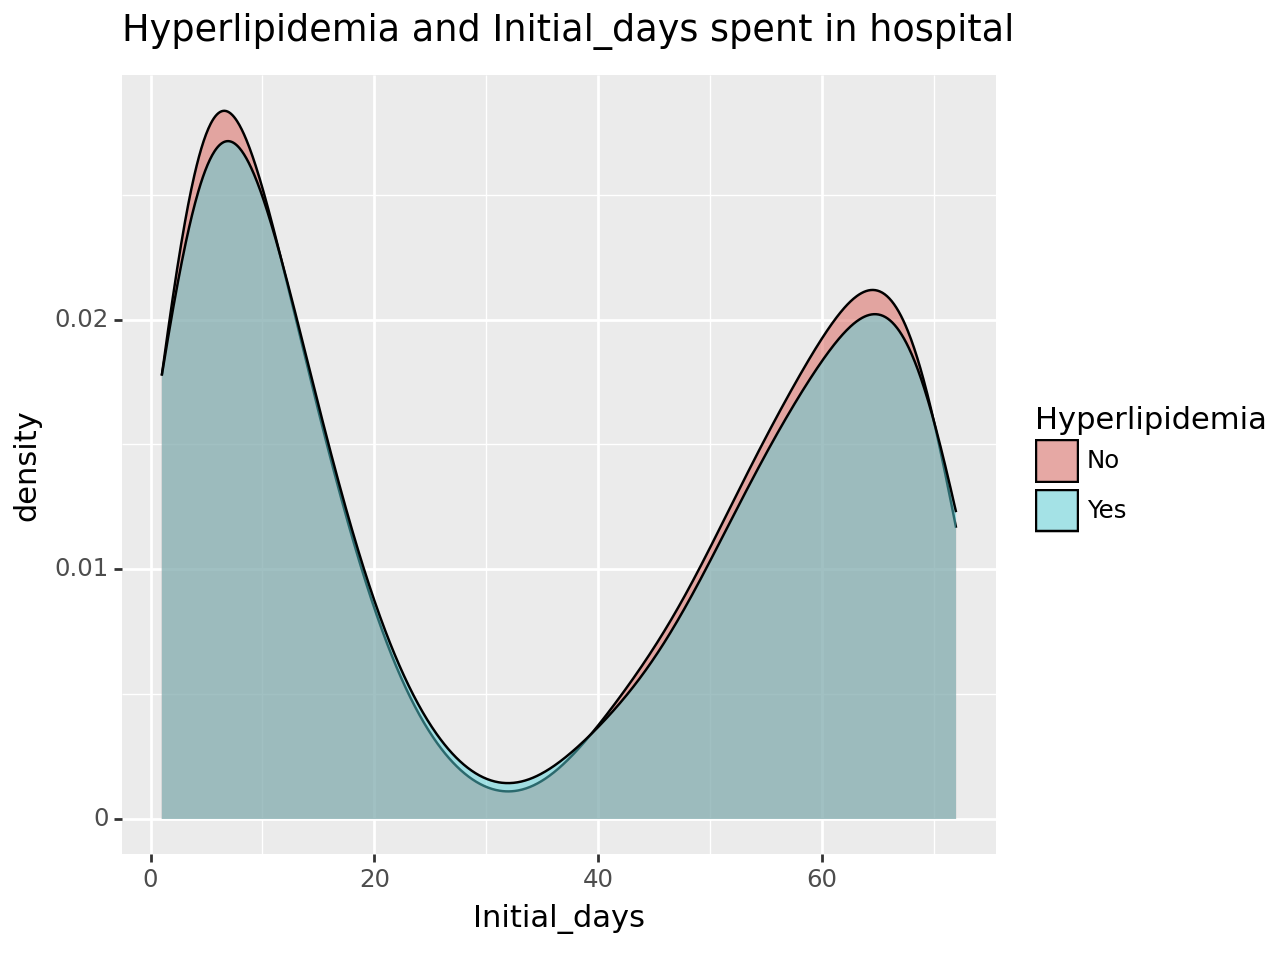

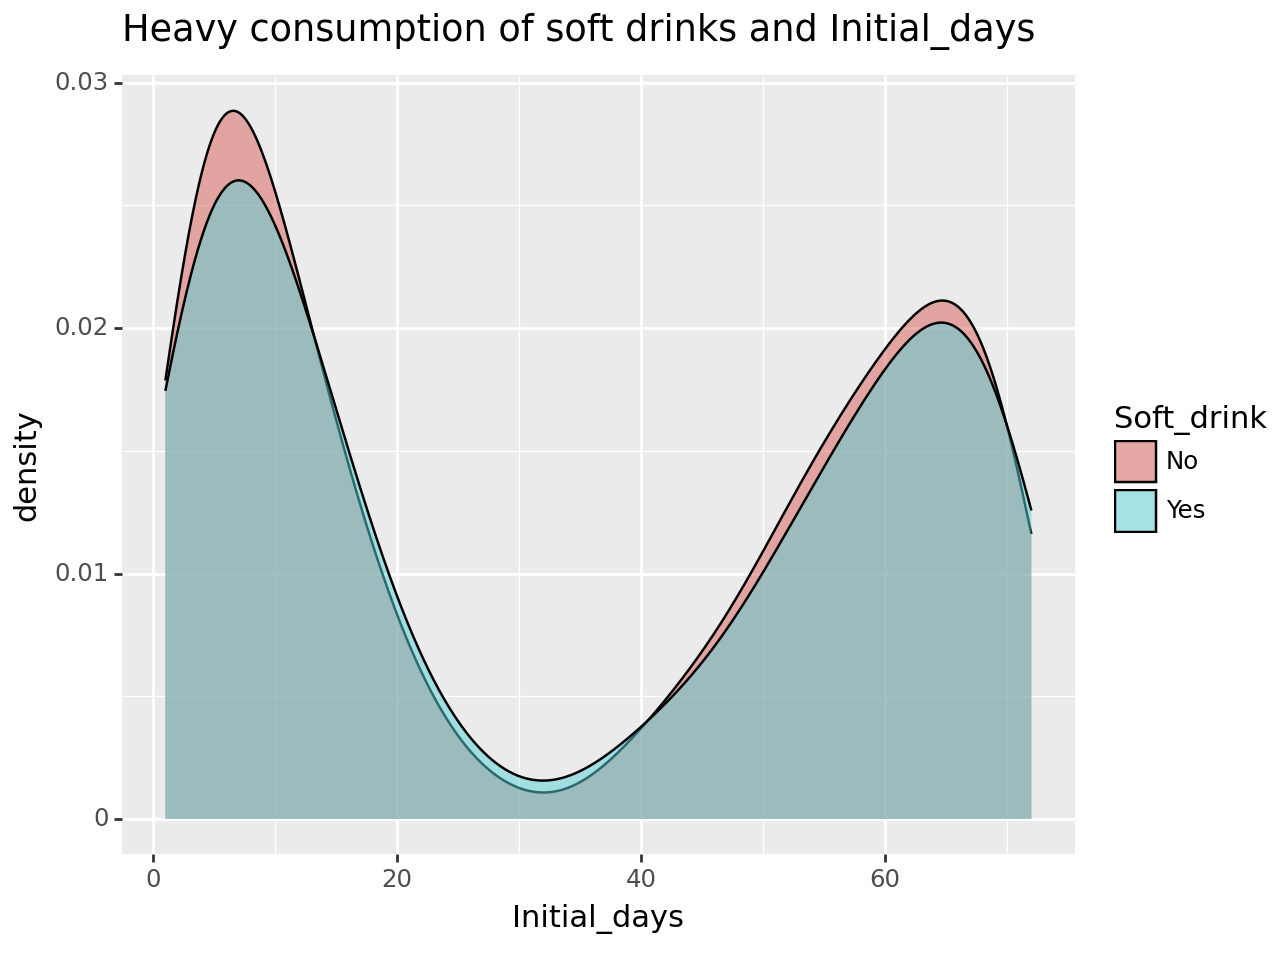

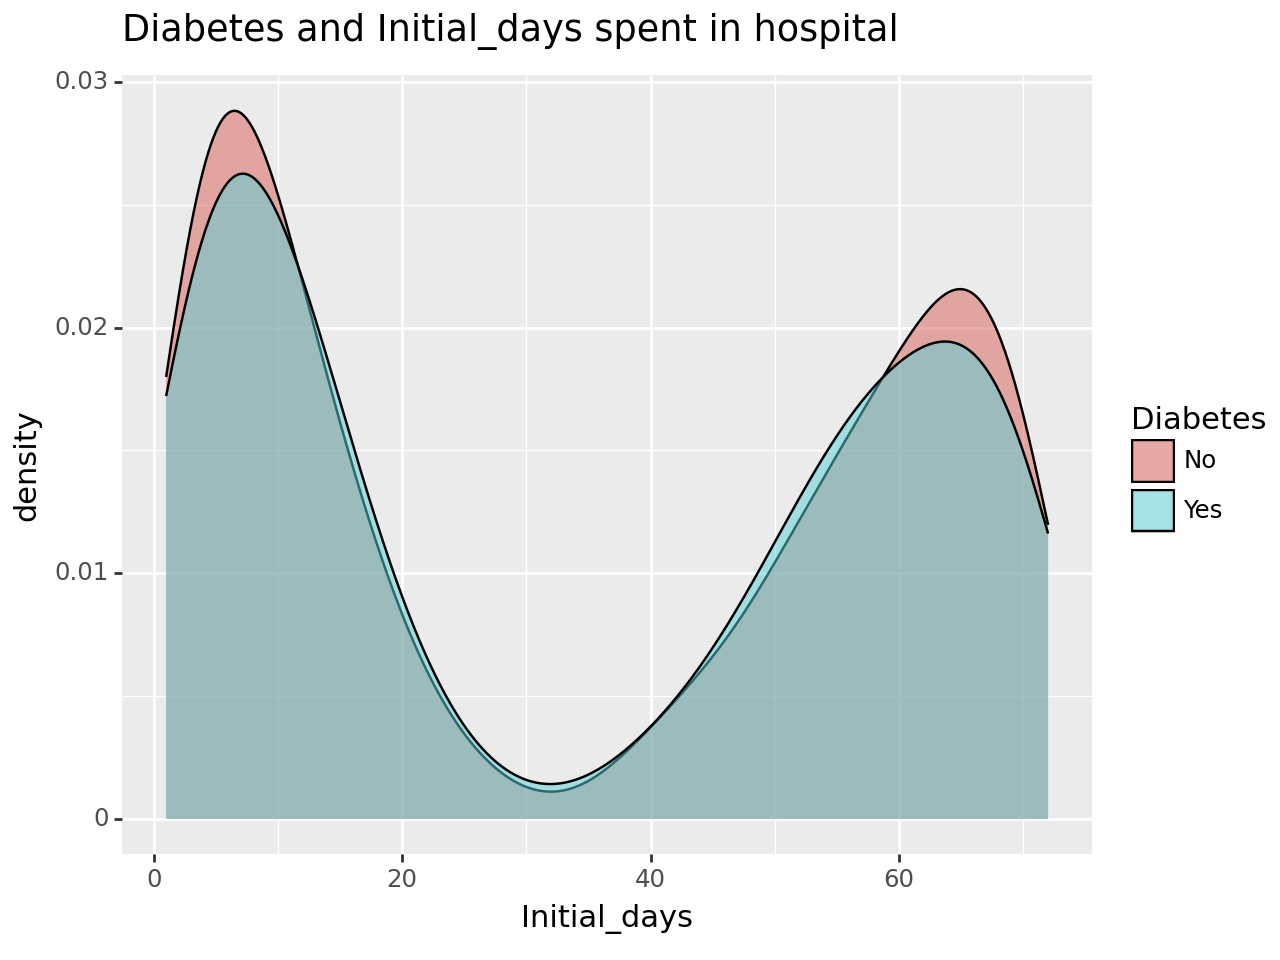

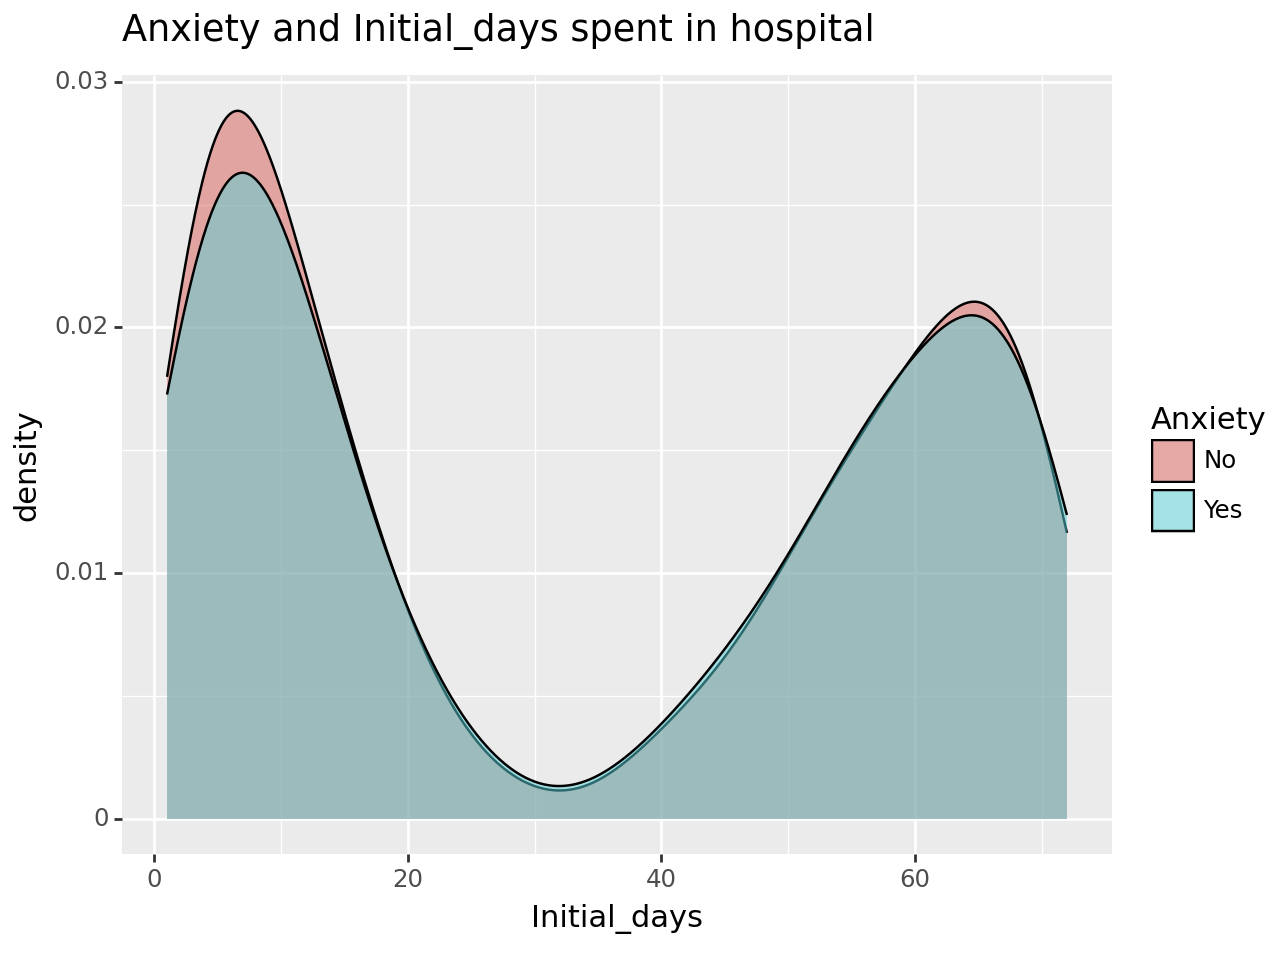

In [9]:
# Density plot | Bivariate with response variable, Initial_days
# Gender
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Gender')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "Gender and Initial_days spent in hospital")
    )
# ReAdmis
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Readmissions and Initial_days spent in hospital")
    )
# Initial_admin
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Initial_admin')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "Initial_admin and Initial Days spent in hospital")
    )
# HighBlood
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='HighBlood')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="HighBlood and Initial_days spent in hospital")
    )
# Complication_risk
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Complication_risk')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Complication_risk and Initial_days spent in hospital")
    )
# Overweight
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Overweight')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Overweight and Initial_days spent in hospital")
    )
# Hyperlipidemia
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Hyperlipidemia')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Hyperlipidemia and Initial_days spent in hospital")
    )
# Soft_drink
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Soft_drink')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Heavy consumption of soft drinks and Initial_days")
    )
# Diabetes
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Diabetes')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Diabetes and Initial_days spent in hospital")
    )
# Anxiety
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='Anxiety')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title="Anxiety and Initial_days spent in hospital")
    )

# C4 - Data Transformation

In [2]:
# C4 - Data Transformation
## Label Encoding; N/Y => 0/1
df['Anxiety'] = df['Anxiety'].replace({'No': 0, 'Yes': 1})
df['Diabetes'] = df['Diabetes'].replace({'No': 0, 'Yes': 1})
df['Soft_drink'] = df['Soft_drink'].replace({'No': 0, 'Yes': 1})
df['ReAdmis'] = df['ReAdmis'].replace({'No': 0, 'Yes': 1})
df['HighBlood'] = df['HighBlood'].replace({'No': 0, 'Yes': 1})
df['Overweight'] = df['Overweight'].replace({'No': 0, 'Yes': 1})
df['Hyperlipidemia'] = df['Hyperlipidemia'].replace({'No': 0, 'Yes': 1})
## Ordinal Encoding
df['Complication_risk'] = df['Complication_risk'].replace({'Low': 1, 'Medium': 2, 'High': 3})
## One Hot Encoding 'Initial_admin' and 'Gender'
onehot_initial_admin = pd.get_dummies(data=df[["Initial_admin"]], dtype=int, drop_first=True) # needed dtype=int to get numbers instead of T/F. To avoid multicolinearity drop_first=True
onehot_gender = pd.get_dummies(data=df["Gender"], drop_first=True, dtype=int)

# C5 - Prepare Dataset

In [3]:
# Select the columns that we want. Add/Concat the new onehot encoded columns
# https://realpython.com/pandas-merge-join-and-concat/
prepped_for_lrm = df[['Initial_days', 'TotalCharge', 'Anxiety', 'Diabetes', 'Soft_drink', 'Additional_charges', 'VitD_levels', 'Income', 'Age', 'ReAdmis', 'HighBlood', 'Overweight', 'Hyperlipidemia', 'Complication_risk']]
prepped_for_lrm = pd.concat([prepped_for_lrm, onehot_initial_admin, onehot_gender], axis="columns")
prepped_for_lrm.to_csv(r'c:/LabFiles/d208/illovsky_d208_c5_medical_prepared.csv', index=False) # path to cleaned csv. Index column not needed

In [4]:
prepped_for_lrm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Initial_days                         10000 non-null  float64
 1   TotalCharge                          10000 non-null  float64
 2   Anxiety                              10000 non-null  int64  
 3   Diabetes                             10000 non-null  int64  
 4   Soft_drink                           10000 non-null  int64  
 5   Additional_charges                   10000 non-null  float64
 6   VitD_levels                          10000 non-null  float64
 7   Income                               10000 non-null  float64
 8   Age                                  10000 non-null  int64  
 9   ReAdmis                              10000 non-null  int64  
 10  HighBlood                            10000 non-null  int64  
 11  Overweight                       

# D1 - Initial Multiple Linear Regression

In [5]:
# Initial Multiple Linear Regression Model
# (Larose & Larose, 2019, Chapter 11.4)
# Explanatory variables
ini_ex = prepped_for_lrm.iloc[:, 1:]
# Target variable
ini_target = prepped_for_lrm.iloc[:, 0]
# add the intercept
ini_ex = sm.add_constant(ini_ex)
ini_model = sm.OLS(ini_target, ini_ex).fit()
# get predictions
predictions = ini_model.predict(ini_ex)
# print(predictions)
# Look at the results. run the summary() command
ini_summary = ini_model.summary()
print(ini_summary)
# Calculate MAE
mae = mean_absolute_error(ini_target, predictions)
print("\nMean Absolute Error:", mae)
ini_rmse = np.sqrt(np.mean((predictions - ini_target)**2))
print(f"\ninitial rmse: {ini_rmse}")
ini_rse = np.sqrt(np.sum(ini_model.resid**2) / ini_model.df_resid)
print(f"initial rse: {ini_rse}")

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.835e+05
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:36:03   Log-Likelihood:                -18149.
No. Observations:               10000   AIC:                         3.633e+04
Df Residuals:                    9982   BIC:                         3.646e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Working to Reduce the Initial Model
### Check for Multicollinearity

In [6]:
vif_eval = ini_ex
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_eval.columns
# calculating VIF for each feature
vif_data["VIF"] = [vif(vif_eval.values, i) for i in range(len(vif_eval.columns))]
print(vif_data)

                                feature         VIF
0                                 const  119.582688
1                           TotalCharge    3.648691
2                               Anxiety    1.003916
3                              Diabetes    1.002563
4                            Soft_drink    1.001781
5                    Additional_charges   16.128550
6                           VitD_levels    1.002665
7                                Income    1.001659
8                                   Age    9.188963
9                               ReAdmis    3.587975
10                            HighBlood    7.790268
11                           Overweight    1.001827
12                       Hyperlipidemia    1.002306
13                    Complication_risk    1.031271
14    Initial_admin_Emergency Admission    1.544929
15  Initial_admin_Observation Admission    1.495403
16                                 Male    1.024338
17                            Nonbinary    1.021099


In [7]:
# drop Additional_charges
vif_eval2 = ini_ex.drop(['Additional_charges'], axis = 1)
# VIF dataframe
vif_data2 = pd.DataFrame()
vif_data2["feature"] = vif_eval2.columns
# calculating VIF for each feature
vif_data2["VIF"] = [vif(vif_eval2.values, i) for i in range(len(vif_eval2.columns))]
print(vif_data2)

                                feature         VIF
0                                 const  115.441211
1                           TotalCharge    3.647822
2                               Anxiety    1.003856
3                              Diabetes    1.002286
4                            Soft_drink    1.001732
5                           VitD_levels    1.002440
6                                Income    1.001652
7                                   Age    1.001223
8                               ReAdmis    3.587335
9                             HighBlood    1.002800
10                           Overweight    1.001746
11                       Hyperlipidemia    1.002305
12                    Complication_risk    1.016234
13    Initial_admin_Emergency Admission    1.523544
14  Initial_admin_Observation Admission    1.494796
15                                 Male    1.022082
16                            Nonbinary    1.021097


## Check Multiple Linear Regression Model

In [8]:
# Explanatory variables
scratch_ex = ini_ex.drop(['Additional_charges'], axis = 1)
# Target variable
scratch_target = prepped_for_lrm.iloc[:, 0]
# add the intercept
scratch_ex = sm.add_constant(scratch_ex)
scratch_model = sm.OLS(scratch_target, scratch_ex).fit()
# Look at the results. run the summary() command
print(scratch_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.948e+05
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:37:26   Log-Likelihood:                -18153.
No. Observations:               10000   AIC:                         3.634e+04
Df Residuals:                    9983   BIC:                         3.646e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Stepwise

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.895e+05
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:31:47   Log-Likelihood:                -18159.
No. Observations:               10000   AIC:                         3.634e+04
Df Residuals:                    9991   BIC:                         3.640e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

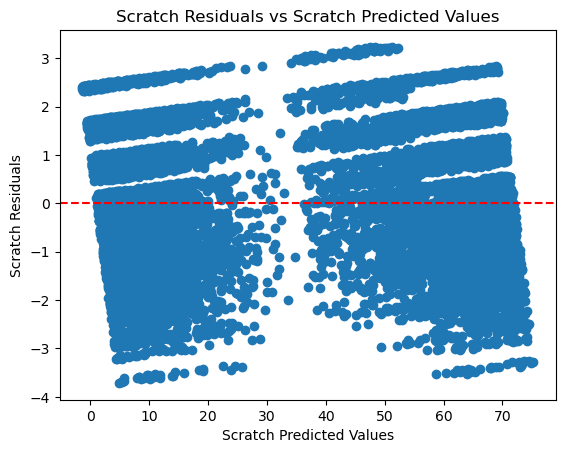

In [23]:
# Explanatory variables
scratch_ex = ini_ex.drop(['Additional_charges', 'Soft_drink', 'Nonbinary', 'Age', 'Overweight', 'Income', 'Male', 'VitD_levels', 'Initial_admin_Observation Admission'], axis = 1)
# Target variable
scratch_target = prepped_for_lrm.iloc[:, 0]
# fit, add the intercept
scratch_ex = sm.add_constant(scratch_ex)
scratch_model = sm.OLS(scratch_target, scratch_ex).fit()
# get predictions
scratch_predictions = scratch_model.predict(scratch_ex)
# Look at the results. run the summary() command
scratch_summary = scratch_model.summary()
print(scratch_summary)
scratch_rmse = np.sqrt(np.mean((scratch_predictions - scratch_target)**2))
print(f"\nscratch rmse: {scratch_rmse}")
scratch_rse = np.sqrt(np.sum(scratch_model.resid**2) / scratch_model.df_resid)
print(f"\nscratch rse: {scratch_rse}")
# using scratch_reduced
residuals_scratch = scratch_model.resid
predicted_scratch = scratch_model.fittedvalues
# plot residuals against predicted values
plt.scatter(predicted_scratch, residuals_scratch)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Scratch Predicted Values')
plt.ylabel('Scratch Residuals')
plt.title('Scratch Residuals vs Scratch Predicted Values')
plt.show()

## Stepwise Reduce
### or use RFE

In [24]:
# initial model in Python
rfe_model = LinearRegression()# sk.RandomForestRegressor()
explanatory = scratch_ex # ini_ex.drop(['Additional_charges'], axis = 1)
target = prepped_for_lrm.iloc[:, 0]
explanatory_train, explanatory_test, target_train, target_test = train_test_split(explanatory, target, test_size=0.25, random_state=0)
# define number of features to evaluate
num_features = [i for i in range(1, explanatory.shape[1]+1)]
# enumerate each number of features
for k in num_features:
    # make pipeline
    rfe = RFE(estimator=rfe_model, n_features_to_select=k, verbose=1)
    model = LinearRegression()
    pipeline = Pipeline(steps=[('rfe_selector',rfe),('dt_regressor',model)])
    # fit data to pipeline
    pipeline.fit(explanatory_train, target_train)
    # evaluate the model
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter. changing scoring from 'neg_mean_absolute_error' to ‘neg_root_mean_squared_error’. per bruce p150. RMSE the most widely used metric to compare regression models
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # neg_root_mean_squared_error is what you like with RandomForestReg
    n_scores = cross_val_score(pipeline, explanatory_test, target_test, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print(f'negative RMSE (stdev)=>{k} {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})')
    # print(explanatory.columns[rfe.support_])
    # print the remaining variables
    remaining_vars = ', '.join(explanatory.columns[rfe.support_])
    print(f'Remaining variables: {remaining_vars}\n')

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
negative RMSE (stdev)=>1 -14.090 (0.839)
Remaining variables: ReAdmis

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
negative RMSE (stdev)=>2 -14.069 (0.849)
Remaining variables: ReAdmis, Initial_admin_Emergency Admission

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
negative RMSE (stdev)=>3 -14.062 (0.848)
Remaining variables: Anxiety, ReAdmis, Initial_

In [14]:
# sklearn.metrics.get_scorer_names() to get valid options.
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

# D3 - Reduced Multiple Linear Regression Model

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.235e+05
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:44:33   Log-Likelihood:                -20141.
No. Observations:               10000   AIC:                         4.029e+04
Df Residuals:                    9995   BIC:                         4.033e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

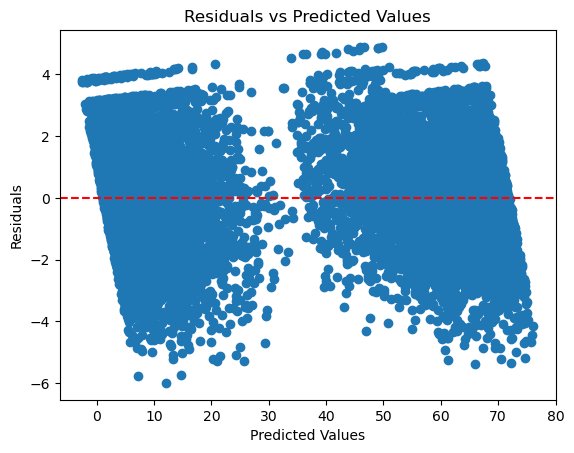

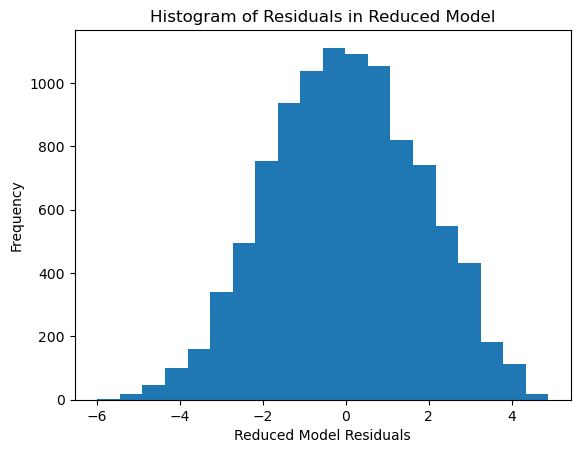

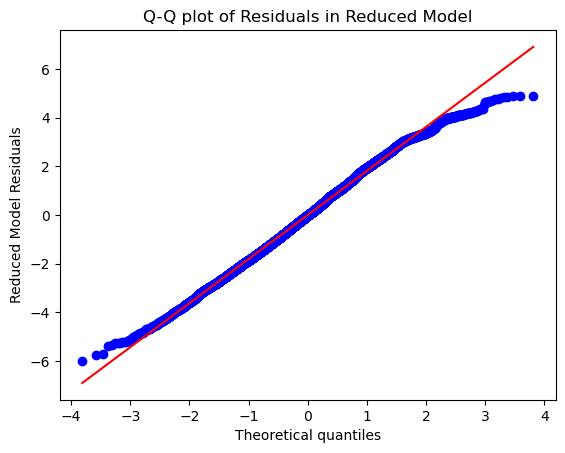

In [11]:
# D3 - Reduced Multiple Linear Regression
# Explanatory variables
explanatory_var = pd.DataFrame(ini_ex[['TotalCharge', 'ReAdmis', 'Complication_risk', 'Initial_admin_Emergency Admission']])
# Target variable
target = prepped_for_lrm.iloc[:, 0]
# fit and add the intercept
explanatory_var = sm.add_constant(explanatory_var)
model_reduced = sm.OLS(target, explanatory_var).fit()
# get predictions
predictions_reduced = model_reduced.predict(explanatory_var)
# Look at the results. run the summary() command
print(model_reduced.summary())
# Calculate MAE
mae = mean_absolute_error(target, predictions_reduced)
print("\nMean Absolute Error:", mae)
# RMSE
rmse_reduced = np.sqrt(np.mean((predictions_reduced - target)**2))
print(f"\nreduced rmse: {rmse_reduced}")
# RSE
reduced_residual_standard_error = np.sqrt(np.sum(model_reduced.resid**2) / model_reduced.df_resid)
print(f"\nreduced rse: {reduced_residual_standard_error}")

# using model_reduced
residuals_reduceded = model_reduced.resid
predicted_reduced = model_reduced.fittedvalues
# plot residuals against predicted values
plt.scatter(predicted_reduced, residuals_reduceded)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
# histogram of residuals
plt.hist(residuals_reduceded, bins=20)
plt.xlabel('Reduced Model Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals in Reduced Model')
plt.show()

# QQ plot of residuals| Test of normality of distribution. This is from webinars
stats.probplot(residuals_reduceded, dist="norm", plot=pylab)
# plt.xlabel(Reduced Model Residuals)
plt.ylabel('Reduced Model Residuals')
plt.title('Q-Q plot of Residuals in Reduced Model')
plt.show()
pylab.show()

# E2 - Outputs and Calculations
## Residual Plots

In [75]:
residuals = model_reduced.resid
print(residuals)

index
1        145.995963
2         11.594422
3       -152.817988
4       -208.361767
5         42.689312
            ...    
9996     -91.917405
9997     -88.216315
9998      96.591061
9999    -266.245576
10000    106.636658
Length: 10000, dtype: float64


In [10]:
# scatterplot of residuals vs predicted Y. visually check for homoscedasticity
# https://www.statology.org/residual-plot-python/
# define figure size
fig = plt.figure(figsize=(12,8))
# produce regression plots
fig = sm.graphics.plot_regress_exog(model_reduced, 'TotalCharge', fig=fig)
plt.show()
# ReAdmis
# scatterplot of residuals vs predicted Y. visually check for homoscedasticity
# define figure size
fig = plt.figure(figsize=(12,8))
# produce regression plots
fig = sm.graphics.plot_regress_exog(model_reduced, 'ReAdmis', fig=fig)
plt.show()
# Complication_risk
# scatterplot of residuals vs predicted Y. visually check for homoscedasticity
# define figure size
fig = plt.figure(figsize=(12,8))
# produce regression plots
fig = sm.graphics.plot_regress_exog(model_reduced, 'Complication_risk', fig=fig)
plt.show()
# Initial_admin_Emergency Admission
# scatterplot of residuals vs predicted Y. visually check for homoscedasticity
# define figure size
fig = plt.figure(figsize=(12,8))
# produce regression plots
fig = sm.graphics.plot_regress_exog(model_reduced, 'Initial_admin_Emergency Admission', fig=fig)
plt.show()

NameError: name 'model_reduced' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
# checking normality of errors (histograms or qq plots of residuals)
# prerequisite: run the reduced multiple linear regression at D3


E3 - Code

In [ ]:
# Foray into standardization
# Model with standardized variables
# Explanatory variables
# explanatory_var = explanatory_var_stand # pd.DataFrame(ini_ex[['TotalCharge', 'ReAdmis', 'Complication_risk', 'Initial_admin_Emergency Admission']])
# explanatory_var.reset_index(drop=True)
# preprep_stand = df[['TotalCharge']]
# prep_stand = pd.concat([explanatory_var_stand, preprep_stand], axis="columns")
# prep_stand
# Scaling to clear error
# Import library
from sklearn.preprocessing import StandardScaler
# create instance of scaler
scaler = StandardScaler()
# fit the scaler to my dataframe.
explanatory_var_stand = pd.DataFrame(ini_ex[['TotalCharge']])
explanatory_var_stand = scaler.fit_transform(explanatory_var_stand)
print(explanatory_var_stand)
# change from NumPy array back to a Pandas dataframe
explanatory_var_stand = pd.DataFrame(explanatory_var_stand)
# explanatory_var_stand = explanatory_var_stand.reset_index(drop=True)
explanatory_var_stand.index = np.arange(1, len(explanatory_var_stand) + 1)
# explanatory_var_stand = explanatory_var_stand.rename(columns={"0": "TotalChargeStand"})
# explanatory_var_stand.values[0] = 'TotalChargeStand'
# explanatory_var = explanatory_var.drop(['TotalCharge'], axis = 1)
# ini_ex.drop(['Additional_charges'], axis = 1)
print(explanatory_var_stand)
# explanatory_var = pd.concat([explanatory_var, explanatory_var_stand], axis="columns")

explanatory_var.columns.values[4] = 'TotalChargeStand'
explanatory_var.describe
